<a href="https://colab.research.google.com/github/santhoshbvsrk/Machine-Learning-Projects/blob/main/BlackFridaySales/BlackFridaySales_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     |████████████████████████████████| 266kB 7.6MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 102kB 7.9MB/s 
     |████████████████████████████████| 1.8MB 13.4MB/s 
     |████████████████████████████████| 14.2MB 326kB/s 
     |████████████████████████████████| 276kB 46.6MB/s 
     |████████████████████████████████| 215kB 46.9MB/s 
     |████████████████████████████████| 1.7MB 50.0MB/s 
     |████████████████████████████████| 6.8MB 36.1MB/s 
     |████████████████████████████████| 245kB 38.6MB/s 
     |████████████████████████████████| 163kB 48.2MB/s 
     |████████████████████████████████| 1.1MB 38.2MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 153kB 53.5MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 604kB 38.6MB/s 
     |████████████████████████████████| 3.1MB 39.4MB/s 


In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
import pandas as pd
import numpy as np

url="https://raw.githubusercontent.com/santhoshbvsrk/Machine-Learning-Projects/main/BlackFridaySales/train.csv"
df=pd.read_csv(url)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data_numeric = df[["User_ID", "Product_Category_1", "Product_Category_2", "Product_Category_3", "Purchase"]].groupby("User_ID").sum().reset_index().drop("User_ID", axis=1)
data_categorical = df.drop_duplicates('User_ID')[["User_ID", "Gender", "Age", "Occupation","City_Category", "Stay_In_Current_City_Years", "Marital_Status"]].reset_index().drop(["index"], axis=1)

In [6]:
data=pd.concat([data_categorical,data_numeric],axis=1)
data[['Product_Category_2','Product_Category_3']]=data[['Product_Category_2','Product_Category_3']].astype('int64')
data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,213,132,148,334093
1,1000002,M,55+,16,C,4+,0,354,539,359,810472
2,1000003,M,26-35,15,A,3,0,93,117,148,341635
3,1000004,M,46-50,7,B,2,1,33,102,127,206468
4,1000005,M,26-35,20,A,1,1,659,642,207,821001


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     5891 non-null   int64 
 1   Gender                      5891 non-null   object
 2   Age                         5891 non-null   object
 3   Occupation                  5891 non-null   int64 
 4   City_Category               5891 non-null   object
 5   Stay_In_Current_City_Years  5891 non-null   object
 6   Marital_Status              5891 non-null   int64 
 7   Product_Category_1          5891 non-null   int64 
 8   Product_Category_2          5891 non-null   int64 
 9   Product_Category_3          5891 non-null   int64 
 10  Purchase                    5891 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 506.4+ KB


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_col = data.select_dtypes(include="object").columns.tolist()
for i in cat_col:
    data.loc[:, i] = le.fit_transform(data.loc[:, i])

In [9]:
data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,0,0,10,0,2,0,213,132,148,334093
1,1000002,1,6,16,2,4,0,354,539,359,810472
2,1000003,1,2,15,0,3,0,93,117,148,341635
3,1000004,1,4,7,1,2,1,33,102,127,206468
4,1000005,1,2,20,0,1,1,659,642,207,821001


In [10]:
from pycaret.regression import *

In [11]:
exp_reg = setup(data, target='Purchase')

,Description,Value
0,session_id,2331
1,Target,Purchase
2,Original Data,"(5891, 11)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4123, 22)"


In [12]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,108687.8120,3.308589e+10,1.806821e+05,0.9610,0.2091,0.1701,0.015
en,Elastic Net,108740.2445,3.309627e+10,1.807162e+05,0.9609,0.2094,0.1705,0.047
lr,Linear Regression,109209.1180,3.323781e+10,1.811152e+05,0.9608,0.2123,0.1729,0.282
lasso,Lasso Regression,109208.2695,3.323752e+10,1.811144e+05,0.9608,0.2123,0.1729,0.040
ridge,Ridge Regression,109207.1586,3.323715e+10,1.811134e+05,0.9608,0.2123,0.1729,0.012
lar,Least Angle Regression,109209.2016,3.323788e+10,1.811154e+05,0.9608,0.2123,0.1729,0.016
llar,Lasso Least Angle Regression,109196.6631,3.323205e+10,1.810989e+05,0.9608,0.2123,0.1728,0.016
omp,Orthogonal Matching Pursuit,115925.3471,3.653980e+10,1.898399e+05,0.9568,0.2267,0.1839,0.013
huber,Huber Regressor,113787.2466,3.720103e+10,1.911669e+05,0.9562,0.2143,0.1708,0.055
gbr,Gradient Boosting Regressor,111777.9669,3.842279e+10,1.942971e+05,0.9548,0.2125,0.1697,0.495


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [27]:
model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,120654.9906,3.711686e+10,192657.3636,0.9528,0.2012,0.1658
1,108621.5567,3.325056e+10,182347.3538,0.9564,0.1958,0.1580
2,106677.5459,3.385515e+10,183997.6797,0.9655,0.2028,0.1628
3,101143.3504,2.623003e+10,161956.8732,0.9593,0.2070,0.1633
4,104627.5809,3.241829e+10,180050.7995,0.9643,0.1998,0.1631
5,108733.7788,3.458889e+10,185980.8928,0.9564,0.1975,0.1607
6,117629.3382,5.085894e+10,225519.2602,0.9403,0.2174,0.1735
7,130012.5084,5.968010e+10,244295.0986,0.9397,0.2215,0.1786
8,115174.5503,3.345306e+10,182901.7897,0.9636,0.2109,0.1668
9,114419.5263,4.495532e+10,212026.6982,0.9453,0.1985,0.1583


In [ ]:
tuned_rf = tune_model(model)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:43:18
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


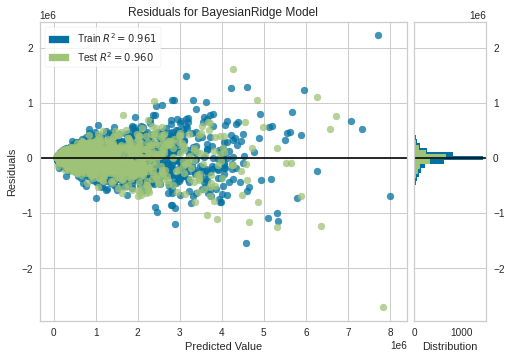

In [15]:
plot_model(tuned_rf)

In [20]:
pip install interpret

     |████████████████████████████████| 5.8MB 1.7MB/s 
     |████████████████████████████████| 1.8MB 34.4MB/s 
     |████████████████████████████████| 3.6MB 39.8MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
     |████████████████████████████████| 5.6MB 19.9MB/s 
     |████████████████████████████████| 296kB 48.6MB/s 
     |████████████████████████████████| 276kB 48.2MB/s 
     |████████████████████████████████| 788kB 39.5MB/s 
     |████████████████████████████████| 122kB 48.2MB/s 
     |████████████████████████████████| 860kB 41.1MB/s 
     |████████████████████████████████| 358kB 43.3MB/s 
     |████████████████████████████████| 1.0MB 42.0MB/s 
     |████████████████████████████████| 3.5MB 36.3MB/s 
     |████████████████████████████████| 194kB 47.9MB/s 
     |████████████████████████████████| 163kB 57.1MB/s 
     |████████████████████████████████| 245kB 49.6MB/s 
     |████████████████████████████████| 368kB 47.7MB/s 
     |████████████████████████████████| 358kB 48.5

In [16]:
interpret_model(tuned_br)

TypeError: ignored

In [18]:
predictions = predict_model(tuned_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,116787.8998,3.945755e+10,198639.2338,0.9601,0.2082,0.17


In [20]:
finalize_model(tuned_br)

BayesianRidge(alpha_1=0.2, alpha_2=0.05, alpha_init=None, compute_score=False,
              copy_X=True, fit_intercept=False, lambda_1=0.2, lambda_2=0.1,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

In [23]:
save_model(tuned_br, 'BlackFridaySales_br')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Purchase',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  BayesianRidge(alpha_1=0.2, alpha_2=0.05, alpha_init=None,


In [24]:
best_model=ensemble_model(tune_model(compare_models(),choose_better=True),choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,113113.0437,3.047844e+10,174580.7522,0.9612,0.2011,0.1644
1,104769.8644,3.121194e+10,176669.0077,0.9591,0.2050,0.1699
2,106355.3007,3.110599e+10,176368.9117,0.9683,0.2084,0.1689
3,98396.3082,2.392675e+10,154682.7489,0.9629,0.2116,0.1692
4,100633.3295,2.773163e+10,166528.1533,0.9694,0.1976,0.1616
5,105599.4368,3.228584e+10,179682.6138,0.9593,0.1956,0.1604
6,111549.0341,3.252888e+10,180357.6370,0.9618,0.2187,0.1793
7,128025.9379,5.678732e+10,238300.8946,0.9426,0.2310,0.1897
8,110215.8257,2.918786e+10,170844.5582,0.9682,0.2076,0.1665
9,107976.9490,3.554900e+10,188544.4255,0.9567,0.2090,0.1655


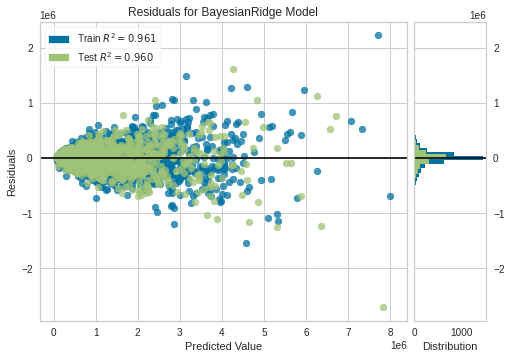

In [25]:
plot_model(best_model)

In [26]:
predictions = predict_model(tuned_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,116787.8998,3.945755e+10,198639.2338,0.9601,0.2082,0.17
